## Simple Linear Regression

### Data Pre-processing

In [9]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
# Importing the dataset
dataset = pd.read_csv(r'C:\Users\sruja\Spyder\Salary_Data.csv')   

In [11]:
# Dependent and independent variables
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state=0)

In [13]:
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)

### Model Building

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

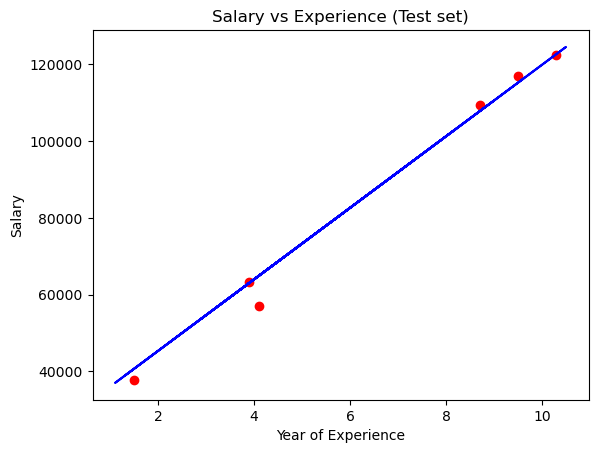

In [16]:
plt.scatter(x_test, y_test, color = 'red')  # Real salary data
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

### Prediction

In [18]:
m_slope = regressor.coef_
print(m_slope)

c_inter = regressor.intercept_
print(c_inter)

# Using Linear Regression
y_15 = m_slope*15 + c_inter  # predicting the salary for 15 years experienced
y_20 = m_slope*20 + c_inter  # predicting the salary for 20 years experienced

[9312.57512673]
26780.09915062818


In [19]:
# Compare the predicted and the actual salaries
comparison = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
print(comparison)

    Actual      Predicted
2    37731   40748.961841
28  122391  122699.622956
13   57081   64961.657170
10   63218   63099.142145
26  116969  115249.562855
24  109431  107799.502753


In [20]:
dataset.mean()
dataset['Salary'].mean()
dataset['Salary'].mode()
dataset.describe()
dataset.var()
dataset.std()
dataset.corr()
dataset['Salary'].corr(dataset['YearsExperience'])
dataset.skew()
dataset['Salary'].skew()
dataset.sem()     # standard error of entire dataset

YearsExperience       0.518125
Salary             5005.167198
dtype: float64

In [21]:
# z-score
import scipy.stats as stats
dataset.apply(stats.zscore)  # z-score of entire dataset
stats.zscore(dataset['Salary']) # z-score of a particular column

0    -1.360113
1    -1.105527
2    -1.419919
3    -1.204957
4    -1.339781
5    -0.718307
6    -0.588158
7    -0.799817
8    -0.428810
9    -0.698013
10   -0.474333
11   -0.749769
12   -0.706620
13   -0.702020
14   -0.552504
15   -0.299217
16   -0.370043
17    0.262859
18    0.198860
19    0.665476
20    0.583780
21    0.826233
22    0.938611
23    1.402741
24    1.240203
25    1.097402
26    1.519868
27    1.359074
28    1.721028
29    1.701773
Name: Salary, dtype: float64

In [22]:
# ssr 
y_mean = np.mean(y)
SSR = np.sum((y_pred-y_mean)**2)
print(SSR)

6263152884.28413


In [23]:
#sse
y = y[0:6]
SSE = np.sum((y-y_pred)**2)
print(SSE)

15274062883.943203


In [24]:
#sst 
mean_total = np.mean(dataset.values) # here df.to_numpy()will convert pandas Dataframe to Nump
SST = np.sum((dataset.values-mean_total)**2)
print(SST)

108429703765.82735


In [28]:
#r2 
r_square = 1 - SSR/SST
r_square

0.9422376648947554

**R² (r-squared) is close to 1, the model explains most of the variability of the dependent variable**

In [26]:
bias = regressor.score(x_train, y_train)
print(bias)

0.9411949620562126


In [27]:
variance = regressor.score(x_test, y_test)
print(variance)

0.988169515729126


Based on the bias and varaince for our model, we can say that it is a best-fit model.